In [1]:
# Dependencies
import pandas as pd
import requests
import gmaps
from pprint import pprint
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from scipy.stats import boxcox

from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
h1n1_df = pd.read_csv('Resources/H1N1_dataset.csv')

grouped_df = h1n1_df.groupby("Country").sum()
grouped_df.head()


,Cumulative no. of cases,Cumulative no. of deaths
Country,,
Algeria,19,0
Antigua and Barbuda,12,0
Argentina,14045,175
Australia,39519,39
Austria,173,0


In [3]:
grouped_df['Lat'] = ''
grouped_df['Lng'] = ''
grouped_df.reset_index(inplace=True)
grouped_df

,Country,Cumulative no. of cases,Cumulative no. of deaths,Lat,Lng
0,Algeria,19,0,,
1,Antigua and Barbuda,12,0,,
2,Argentina,14045,175,,
3,Australia,39519,39,,
4,Austria,173,0,,
...,...,...,...,...,...
143,Venezuela,1327,0,,
144,Viet Nam,822,0,,
145,Virgin Islands,1,0,,
146,West Bank and Gaza Strip,146,0,,


In [4]:
# create a params dict that will be updated with new city each iteration
params = {"key": gkey}
lat = []
lng = []
# Loop through the cities_pd and run a lat/long search for each city
for i,row in grouped_df.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    country = row['Country']
    params['address'] = f"{country}"
    try:
        response = requests.get(base_url, params=params).json()    
        grouped_df.loc[i, 'Lat'] = response["results"][0]["geometry"]["location"]["lat"]
        grouped_df.loc[i, 'Lng'] = response["results"][0]["geometry"]["location"]["lng"]

    except:
        print(f"{country} not found. skipping....")
        pass


grouped_df.head(20)

Bermuda, UKOT not found. skipping....
British Virgin Islands,  UKOT not found. skipping....
British Virgin Islands, UKOT not found. skipping....
Cayman Islands, UKOT not found. skipping....
France, French Polynesia, FOC not found. skipping....
France, Martinique, FOC not found. skipping....
France, New Caledonia, FOC not found. skipping....
French Polynesia, FOC not found. skipping....
Guadaloupe, FOC not found. skipping....
Martinique, FOC not found. skipping....
Netherlands, Curacao, OT not found. skipping....
New Caledonia, FOC not found. skipping....
United Kingdom, Isle of Man, Crown Dependency not found. skipping....


,Country,Cumulative no. of cases,Cumulative no. of deaths,Lat,Lng
0,Algeria,19,0,28.0339,1.65963
1,Antigua and Barbuda,12,0,17.0608,-61.7964
2,Argentina,14045,175,-38.4161,-63.6167
3,Australia,39519,39,-25.2744,133.775
4,Austria,173,0,47.5162,14.5501
5,Bahamas,46,0,25.0343,-77.3963
6,Bahrain,139,0,26.0667,50.5577
7,Bangladesh,35,0,23.685,90.3563
8,Barbados,84,0,13.1939,-59.5432
9,Belgium,505,0,50.5039,4.46994


In [5]:
grouped_df['Lat'].replace('',np.nan,inplace = True)
grouped_df = grouped_df.dropna()
grouped_df

,Country,Cumulative no. of cases,Cumulative no. of deaths,Lat,Lng
0,Algeria,19,0,28.033886,1.65963
1,Antigua and Barbuda,12,0,17.060816,-61.7964
2,Argentina,14045,175,-38.416097,-63.6167
3,Australia,39519,39,-25.274398,133.775
4,Austria,173,0,47.516231,14.5501
...,...,...,...,...,...
143,Venezuela,1327,0,6.423750,-66.5897
144,Viet Nam,822,0,14.058324,108.277
145,Virgin Islands,1,0,18.335765,-64.8963
146,West Bank and Gaza Strip,146,0,31.354676,34.3088


In [6]:
# lat = grouped_df['Lat']
# lng = grouped_df['Lng']
locations = grouped_df[["Lat", "Lng"]]

rating = grouped_df["Cumulative no. of cases"]
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations,weights=rating, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
covid_df = pd.read_csv('Resources/Covid_new_data.csv')
covid_grouped_df = covid_df.groupby("Country").sum()
mean_covid = covid_grouped_df['Total Cases'].mean()
mean_h1n1 = grouped_df['Cumulative no. of cases'].mean()
print(mean_h1n1)
print(mean_covid)

7207.533333333334
4613372.88172043


In [8]:
population1 = grouped_df['Cumulative no. of cases']
population2 = covid_grouped_df['Total Cases']


In [9]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-2.261364645194604, pvalue=0.024900607411744394)

(array([130.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 4.185410e+04, 8.370720e+04, 1.255603e+05,
        1.674134e+05, 2.092665e+05, 2.511196e+05, 2.929727e+05,
        3.348258e+05, 3.766789e+05, 4.185320e+05]),
 <a list of 10 Patch objects>)

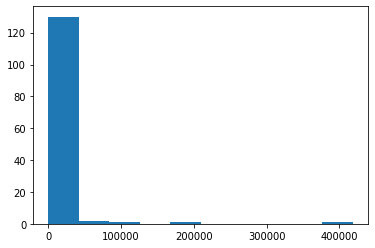

In [10]:
plt.hist(population1)

(array([16., 15., 24., 21., 19., 17., 12.,  5.,  4.,  2.]),
 array([ 0.        ,  1.29445086,  2.58890173,  3.88335259,  5.17780345,
         6.47225431,  7.76670518,  9.06115604, 10.3556069 , 11.65005777,
        12.94450863]),
 <a list of 10 Patch objects>)

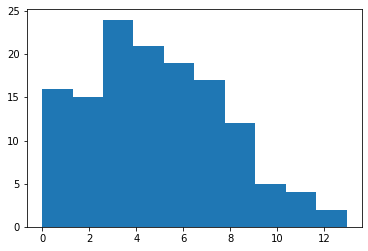

In [11]:
data = boxcox(population1,0)
plt.hist(data)


(array([183.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([8.01000000e+02, 3.68308489e+07, 7.36608968e+07, 1.10490945e+08,
        1.47320993e+08, 1.84151040e+08, 2.20981088e+08, 2.57811136e+08,
        2.94641184e+08, 3.31471232e+08, 3.68301280e+08]),
 <a list of 10 Patch objects>)

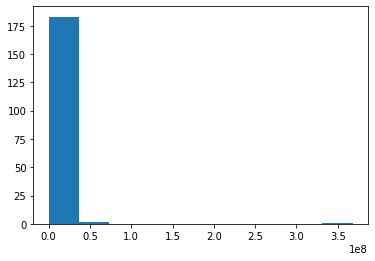

In [12]:
plt.hist(population2)

(array([14., 10., 17., 39., 37., 28., 23., 14.,  3.,  1.]),
 array([ 6.68586095,  7.98971604,  9.29357113, 10.59742622, 11.90128131,
        13.2051364 , 14.50899149, 15.81284658, 17.11670167, 18.42055677,
        19.72441186]),
 <a list of 10 Patch objects>)

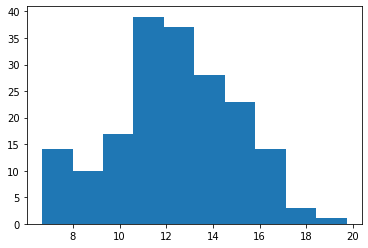

In [13]:
data2 = boxcox(population2,0)
plt.hist(data2)

In [14]:
test = stats.mannwhitneyu(population1,population2)
test

MannwhitneyuResult(statistic=749.0, pvalue=3.3389292177876497e-47)

In [15]:
stats.ttest_ind(data, data2, equal_var=False)

Ttest_indResult(statistic=-24.04845127719355, pvalue=5.410365022856593e-69)